In [150]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
print(os.getcwd())

/Users/hbh/LocalDocs/Training/ASU/Activity Files


In [152]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [153]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [154]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Standardize the data using StandardScaler
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)



In [157]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)


# Copy the crypto names from the original data, where coid_id is the index
market_data_scaled_df["coin_id"] = market_data_df.index


# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index("coin_id")


# Display sample data
market_data_scaled_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [158]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)


# Create an empty list to store the inertia values
inertia_values = []  # Initialize an empty list to store inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_data_scaled_df)
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


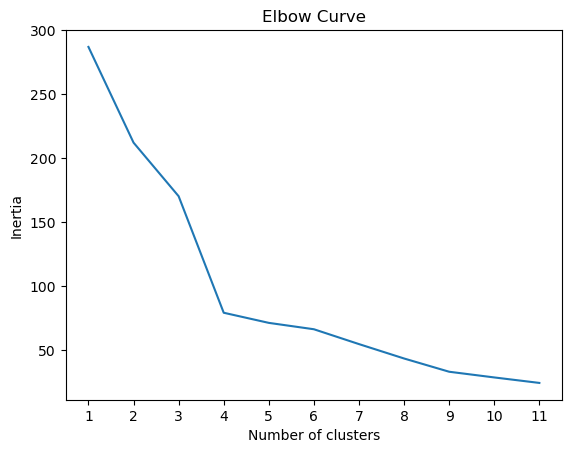

In [159]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(elbow_df['k'])
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



#### Answer the following question: 
**Question:** What is the best value for `k`?


**Answer:**
The optimal  k  value appears to be 4. This is where the “elbow” is most noticeable, meaning the rate of decrease in inertia slows down significantly after k=4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [160]:
# Initialize the K-Means model using the best value for k
# In this case, the best value for k is 4
kmeans = KMeans(n_clusters=4, random_state=42)



In [161]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)


KMeans(n_clusters=4, random_state=42)

In [162]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster = kmeans.predict(market_data_scaled_df)



# View the resulting array of cluster values.
cluster[:10]



array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

In [164]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()


In [165]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = kmeans.labels_



# Display sample data
clustered_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

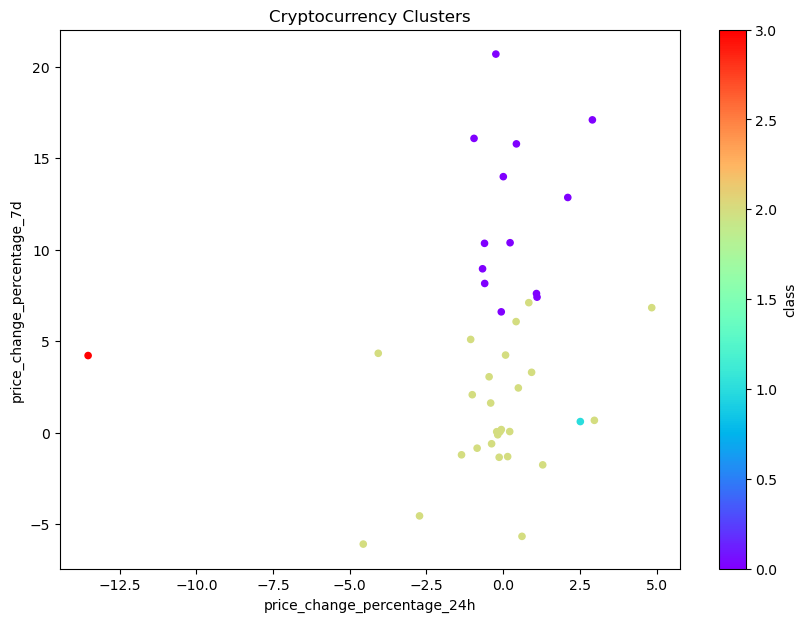

In [169]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", figsize=(10, 7), colorbar=True, title="Cryptocurrency Clusters")





### Optimize Clusters with Principal Component Analysis.

In [170]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [171]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)



# View the first five rows of the DataFrame. 
market_data_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [172]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The explained variance results indicate how much information each principal component retains from the original data. The total explained variance is 
0.3719856 + 0.34700813 + 0.17603793 = .895 or approximately 89.5%. This means that these three principal components together explain about 89.5% of the variance in the original data. 

In [174]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=market_data_pca, columns=["PCA1", "PCA2", "PCA3"], index=market_data_scaled_df.index
)


# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_df.index


# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")


# Display sample data
pca_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [175]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)


# Create an empty list to store the inertia values
inertia = []  # Initialize an empty list to store inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


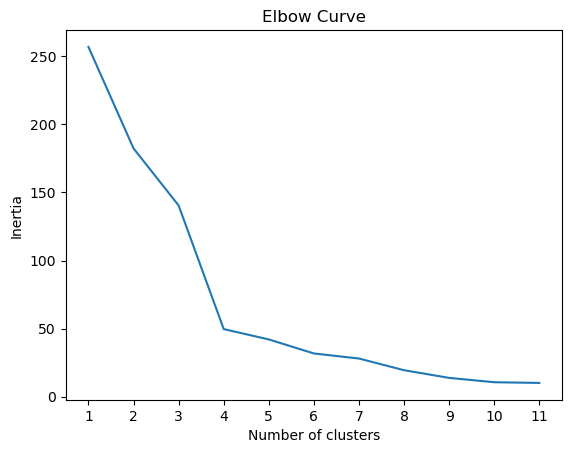

In [176]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(elbow_df['k'])
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
The optimal  k  value appears to be 4. This is where the “elbow” is most noticeable, meaning the rate of decrease in inertia slows down significantly after k=4.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [177]:
# Initialize the K-Means model using the best value for k
# In this case, the best value for k is 4
kmeans = KMeans(n_clusters=4, random_state=42)


In [178]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


KMeans(n_clusters=4, random_state=42)

In [179]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster = kmeans.predict(pca_df)


# Print the resulting array of cluster values.
cluster[:10]


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

In [181]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = kmeans.labels_



# Display sample data
clustered_df.head(10)


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='PCA1', ylabel='PCA2'>

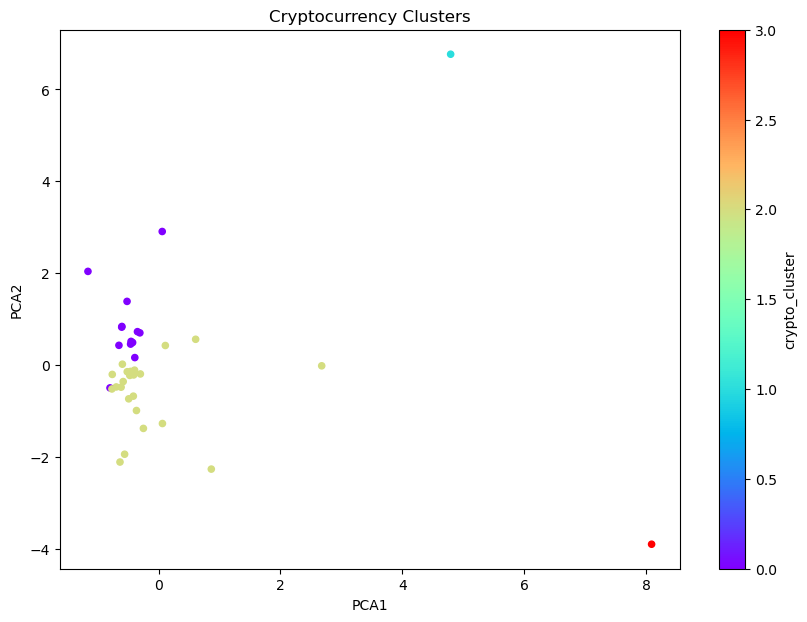

In [193]:
# create a test scatter plot
clustered_df.plot.scatter(x="PCA1", y="PCA2", c="crypto_cluster", colormap="rainbow", figsize=(10, 7), colorbar=True, title="Cryptocurrency Clusters")

# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "crypto_cluster" for the color to better visualize the data.
# import hvplot.pandas
# clustered_plot = clustered_df.hvplot.scatter(x="PCA1", y="PCA2", by="crypto_cluster", hover_cols=["coin_id"])
# clustered_plot

### Determine the Weights of Each Feature on each Principal Component

In [194]:
# Use the columns from the original scaled DataFrame as the index.
# This will allow you to merge the original DataFrame with the clustered DataFrame.
market_data_scaled_df = market_data_scaled_df.reset_index()



#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    PC1:
	•	Strongest positive influences: price_change_percentage_200d and price_change_percentage_1y
	•	Strongest negative influence: price_change_percentage_24h
	
	PC2:
	•	Strongest positive influences: price_change_percentage_30d and price_change_percentage_14d
	•	Strongest negative influence: price_change_percentage_1y
	
	PC3:
	•	Strongest positive influence: price_change_percentage_7d
	•	Strongest negative influence: price_change_percentage_24h
    

In [196]:
# print my python version, and print all my library versions
import sys
print(sys.version)

# print the versions of the libraries that I used in this project
import pandas as pd
import requests
import json
print(f"pandas version: {pd.__version__}")
print(f"requests version: {requests.__version__}")
print(f"json version: {json.__version__}")

# print all versions of packages and libraries I used in this project
import os
os.system("pip freeze")
# output to a file
os.system("pip freeze > requirements.txt")
# print the contents of the file
os.system("cat requirements.txt")

3.10.14 (main, May  6 2024, 14:42:37) [Clang 14.0.6 ]
pandas version: 2.2.2
requests version: 2.32.3
json version: 2.0.9
aiobotocore @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_1cl06d5vjc/croot/aiobotocore_1714464399334/work
aiohttp @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_1bydo4860s/croot/aiohttp_1715108783113/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_39uesgct45/croot/alabaster_1718201495024/work
altair @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_a8x4081_4h/croot/altair_1687526044471/work
anyio @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a17a7759g2/croot/anyio_1706220182417/work
appdirs==1.4.4
applaunchservices @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_1fiu9w6r9i/croots/

0

te/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_cfdah1hgvk/croot/async-timeout_1703097014863/work
atomicwrites==1.4.0
attrs @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_224434dqzl/croot/attrs_1695717839274/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///croot/autopep8_1708962882016/work
Babel @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_00k1rl2pus/croot/babel_1671781944131/work
bcrypt @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_03v55xv0yj/croots/recipe/bcrypt_1659554335339/work
beautifulsoup4 @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_94rx5n7wo9/croot/beautifulsoup4-split_1718029832430/work
binaryornot @ file:///tmp/build/80754af9/binaryornot_1617751525010/work
black @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_8ey7z344p7/croot/black_1717597500092/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work

gp/T/abs_b9t0odioph/croot/scipy_1717521487325/work/dist/scipy-1.13.1-cp310-cp310-macosx_11_0_arm64.whl#sha256=8741f7b22165ee615e9ecfd6d218381ea80d42f8be4f94e9e6c96e67edb6f43c
Scrapy @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_26idk0ntp9/croot/scrapy_1708714690612/work
seaborn @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_f3_ueh70ud/croot/seaborn_1718302932585/work
Send2Trash @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_5b31f0zzlv/croot/send2trash_1699371144121/work
service-identity @ file:///Users/ktietz/demo/mc3/conda-bld/service_identity_1629460757137/work
sip @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_ba9odc_3u1/croot/sip_1698675938651/work
six==1.16.0
smart-open @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_12ff6ece-d716-4aec-a1e2-7bfc8de4f98e1d6t5p6v/croots/recipe/smart_open_1651563555507/work
smmap @ file:///tmp/build/80754af9/smmap_1611694433573/work
snif